In [2]:
# Step 1: Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [3]:
# Step 2: Load Airbnb NYC dataset
url = "https://data.insideairbnb.com/united-states/ny/new-york-city/2025-10-01/data/listings.csv.gz"
df = pd.read_csv(url, compression='gzip')
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40824219,https://www.airbnb.com/rooms/40824219,20251001171547,2025-10-02,city scrape,Room close to Manhattan for FEMALE guests,This cozy spacious room includes a twin size b...,Sunnyside is a safe residental area. <br />The...,https://a0.muscache.com/pictures/hosting/Hosti...,317540555,https://www.airbnb.com/users/show/317540555,Sevil,2019-12-14,NaN,NaN,within a few hours,100%,54%,t,https://a0.muscache.com/im/pictures/user/771f9...,https://a0.muscache.com/im/pictures/user/771f9...,Sunnyside,3.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,Sunnyside,Queens,40.74698,-73.91763,Private room in townhouse,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Dedicated work...",$66.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,16,46,76,77,2025-10-02,16,2,0,77,0,120,7920.0,2019-12-25,2025-08-06,4.81,4.81,4.88,4.81,4.88,4.94,4.69,NaN,f,3,0,3,0,0.23
1,40833186,https://www.airbnb.com/rooms/40833186,20251001171547,2025-10-02,previous scrape,Soho LES East village private room downtown,NaN,NaN,https://a0.muscache.com/pictures/1f093bbc-936c...,68718914,https://www.airbnb.com/users/show/68718914,Patricio,2016-04-24,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/0b4f9...,https://a0.muscache.com/im/pictures/user/0b4f9...,NaN,1.0,1.0,['phone'],t,t,NaN,Nolita,Manhattan,40.72314,-73.99323,Private room in serviced apartment,Private room,2,NaN,1 shared bath,1.0,NaN,"[""Hot water"", ""Air conditioning"", ""Wifi"", ""TV""...",NaN,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,2025-10-02,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
2,40837137,https://www.airbnb.com/rooms/40837137,20251001171547,2025-10-02,previous scrape,Sunset Park - Quiet and close to subway!,"Cozy, lovely bedroom with a comfortable full s...",the sunset park of Brooklyn,https://a0.muscache.com/pictures/01c4e91e-4012...,317770098,https://www.airbnb.com/users/show/317770098,Xuan,2019-12-15,"New York, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/2c4b1...,https://a0.muscache.com/im/pictures/user/2c4b1...,Sunset Park,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Sunset Park,Brooklyn,40.64607,-74.00552,Private room in home,Private room,1,NaN,1 shared bath,NaN,NaN,"[""Smoke alarm"", ""Kitchen"", ""Hair dryer"", ""Wifi...",NaN,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,NaN,0,0,0,0,2025-10-02,1,0,0,0,0,0,NaN,2020-01-19,2020-01-19,5.00,5.00,4.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.01
3,40838018,https://www.airbnb.com/rooms/40838018,20251001171547,2025-10-02,previous scrape,Cozy On

In [4]:
# Step 3: Basic EDA Overview
df.info()
df.describe(include='all').T.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36111 non-null  int64  
 1   listing_url                                   36111 non-null  object 
 2   scrape_id                                     36111 non-null  int64  
 3   last_scraped                                  36111 non-null  object 
 4   source                                        36111 non-null  object 
 5   name                                          36109 non-null  object 
 6   description                                   35153 non-null  object 
 7   neighborhood_overview                         18704 non-null  object 
 8   picture_url                                   36111 non-null  object 
 9   host_id                                       36111 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,36111.0,NaN,NaN,NaN,466790625367679424.0,544872114813162816.0,2595.0,21594155.0,50953084.0,974769468787780096.0,1521848367963498240.0
listing_url,36111,36111,https://www.airbnb.com/rooms/1518352509290380578,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,36111.0,NaN,NaN,NaN,20251001171547.0,1.441426,20251001171547.0,20251001171547.0,20251001171547.0,20251001171547.0,20251001171547.0
last_scraped,36111,2,2025-10-02,33476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,36111,2,city scrape,21707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,36109,34446,Water View King Bed Hotel Room,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,35153,29846,You'll have a great time at this comfortable p...,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,18704,13989,This furnished apartment is located in Midtown...,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,36111,35367,https://a0.muscache.com/pictures/6998e77e-4564...,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,36111.0,NaN,NaN,NaN,175619453.108083,194562427.807214,1678.0,17958645.0,88326021.0,310773702.0,721443059.0


In [5]:
# Step 4: Clean and preprocess
df = df.dropna(subset=['price', 'neighbourhood', 'latitude', 'longitude'])
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

print(f"Dataset cleaned. Total records: {len(df)}")


Dataset cleaned. Total records: 10883


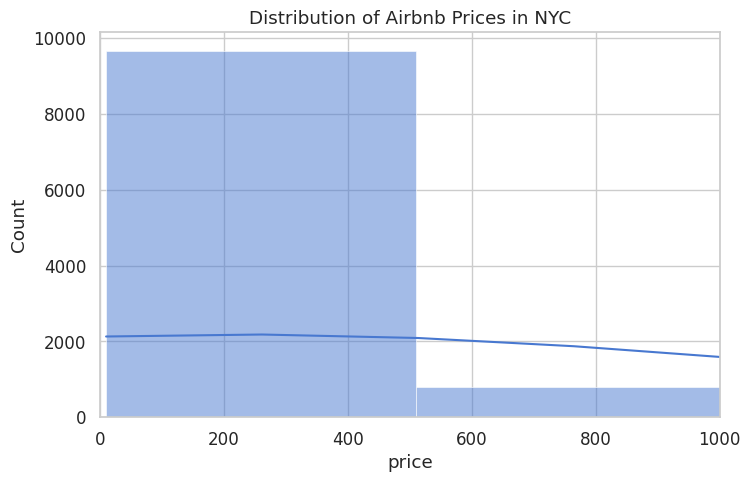

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title("Distribution of Airbnb Prices in NYC")
plt.show()


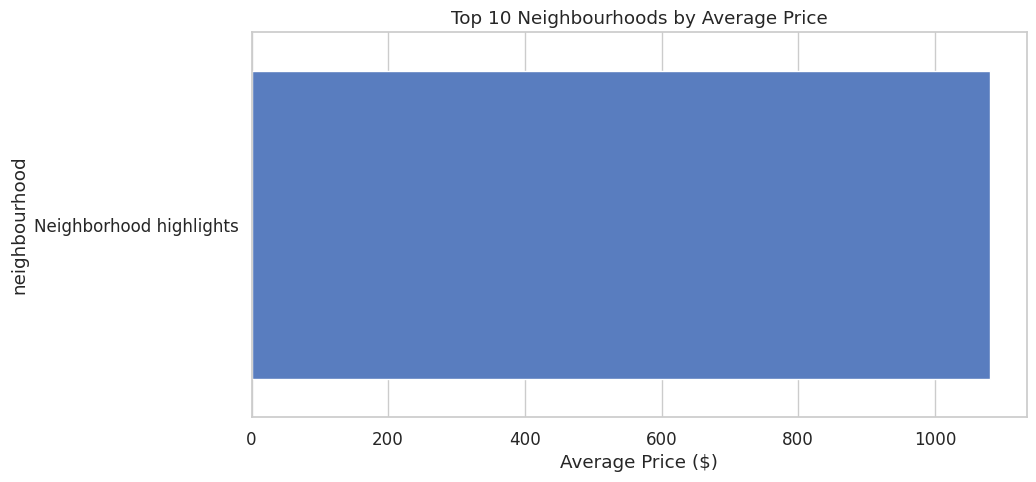

In [7]:
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title("Top 10 Neighbourhoods by Average Price")
plt.xlabel("Average Price ($)")
plt.show()


In [26]:
import pandas as pd

# Load the dataset
url = "https://data.insideairbnb.com/united-states/ny/new-york-city/2025-10-01/data/listings.csv.gz"
df = pd.read_csv(url, compression='gzip')

In [27]:
# This cell is a duplicate of the boxplot in the EDA section and will be removed.

In [10]:
fig = px.scatter_mapbox(df.sample(2000),
                        lat="latitude", lon="longitude",
                        color="price",
                        size_max=10, zoom=10,
                        mapbox_style="carto-positron",
                        title="Airbnb Prices Across NYC")
fig.show()


In [11]:
# ======================================
# 🧩 FEATURE ENGINEERING SECTION
# ======================================


# Make a copy to work safely
df = df.copy()

# --- Price Normalization ---
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# --- Host Response & Acceptance Rates ---
def clean_percent(col):
    return pd.to_numeric(col.str.replace('%', ''), errors='coerce') / 100

for col in ['host_response_rate', 'host_acceptance_rate']:
    if col in df.columns:
        df[col] = clean_percent(df[col])

# --- Host Tenure in Days ---
if 'host_since' in df.columns:
    df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
    df['host_tenure_days'] = (pd.Timestamp('today') - df['host_since']).dt.days

# --- Amenity Count ---
if 'amenities' in df.columns:
    df['amenity_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)

# --- Bathrooms Numeric Extraction ---
if 'bathrooms_text' in df.columns:
    df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# --- Price per Person ---
if 'accommodates' in df.columns:
    df['price_per_person'] = df['price'] / df['accommodates']

# --- Availability Ratio ---
if 'availability_365' in df.columns:
    df['availability_ratio'] = df['availability_365'] / 365

# --- Review Intensity (activity indicator) ---
if 'number_of_reviews' in df.columns and 'reviews_per_month' in df.columns:
    df['review_intensity'] = df['number_of_reviews'] * df['reviews_per_month']

# --- Host Listing Count Bucket ---
if 'host_listings_count' in df.columns:
    df['multi_host'] = np.where(df['host_listings_count'] > 1, 1, 0)

# --- Log-transform price for stability ---
df['log_price'] = np.log1p(df['price'])

# --- Feature correlation check ---
num_features = df.select_dtypes(include=[np.number])
corr = num_features.corr()['price'].sort_values(ascending=False)
display(corr.head(15))

,price
price,1.000000
price_per_person,0.879557
log_price,0.709656
host_total_listings_count,0.401252
host_id,0.243912
host_listings_count,0.233502
estimated_revenue_l365d,0.229572
id,0.198146
maximum_nights,0.128695
accommodates,0.112251


In [12]:
# ======================================
# 🌍 GEOSPATIAL PRICE HEATMAP
# ======================================
import folium
from folium.plugins import HeatMap

# Filter data for realistic prices and non-missing coordinates
geo_df = df[(df['price'] < 1000) & (df['latitude'].notnull()) & (df['longitude'].notnull())]

# Initialize map at city median coordinates
center_lat, center_lon = geo_df['latitude'].median(), geo_df['longitude'].median()
m = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='cartodb dark_matter')

# Prepare data for HeatMap
heat_data = [[row['latitude'], row['longitude'], row['price']] for _, row in geo_df.iterrows()]

HeatMap(heat_data, radius=10, blur=15, max_zoom=1, min_opacity=0.4).add_to(m)
m


In [13]:
!pip install catboost --quiet
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [14]:
# Copy the clean DataFrame
df_model = df.copy()

# Drop obviously non-predictive columns
drop_cols = ['id', 'name', 'host_name', 'last_review', 'neighbourhood_group', 'geometry']
df_model = df_model.drop(columns=[c for c in drop_cols if c in df_model.columns], errors='ignore')

# Define target and features
target = 'price'
features = [col for col in df_model.columns if col != target]

# Identify categorical features (CatBoost can handle them directly)
cat_features = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical features:", cat_features)


Categorical features: ['listing_url', 'last_scraped', 'source', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'license', 'instant_bookable']


In [15]:
# Find columns that still contain NaT or datetime types
datetime_cols = [col for col in df_model.columns if np.issubdtype(df_model[col].dtype, np.datetime64)]
print("Datetime columns still in dataset:", datetime_cols)

# Also check any column that literally has NaT values
for col in df_model.columns:
    if df_model[col].astype(str).str.contains("NaT").any():
        print("NaT found in column:", col)


Datetime columns still in dataset: ['host_since']
NaT found in column: host_since


In [16]:
# Convert to datetime just in case
df_model['host_since'] = pd.to_datetime(df_model['host_since'], errors='coerce')

# Create new time-based features
df_model['host_since_year'] = df_model['host_since'].dt.year
df_model['host_since_month'] = df_model['host_since'].dt.month
df_model['host_since_days_since'] = (pd.Timestamp('today') - df_model['host_since']).dt.days

# Replace missing numeric values with median
df_model['host_since_year'].fillna(df_model['host_since_year'].median(), inplace=True)
df_model['host_since_month'].fillna(df_model['host_since_month'].median(), inplace=True)
df_model['host_since_days_since'].fillna(df_model['host_since_days_since'].median(), inplace=True)

# Drop original datetime column
df_model.drop(columns=['host_since'], inplace=True)


In [ ]:
import matplotlib.pyplot as plt

feature_importances = cat_model.get_feature_importance(prettified=True)
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature Id'], feature_importances['Importances'])
plt.title('Top Feature Importances - CatBoost Price Model')
plt.gca().invert_yaxis()
plt.show()

feature_importances.sort_values('Importances', ascending=False).head(10)


In [ ]:
# Clean and preprocess the price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
!pip install catboost --quiet

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4248.7808731	test: 4531.7438881	best: 4531.7438881 (0)	total: 355ms	remaining: 2m 57s
100:	learn: 847.4250108	test: 1388.0148287	best: 1388.0148287 (100)	total: 17.1s	remaining: 1m 7s
200:	learn: 682.9968816	test: 1305.9646930	best: 1305.7900691 (199)	total: 33.3s	remaining: 49.5s
300:	learn: 593.3308345	test: 1280.1862912	best: 1280.1862912 (300)	total: 49.3s	remaining: 32.6s
400:	learn: 525.7677977	test: 1239.9044532	best: 1239.8500614 (399)	total: 1m 5s	remaining: 16.2s
499:	learn: 473.5549601	test: 1216.5847467	best: 1216.5847467 (499)	total: 1m 21s	remaining: 0us

bestTest = 1216.584747
bestIteration = 499

Train R²: 0.974
Test R²: 0.933
MAE: 188.44
RMSE: 1216.58


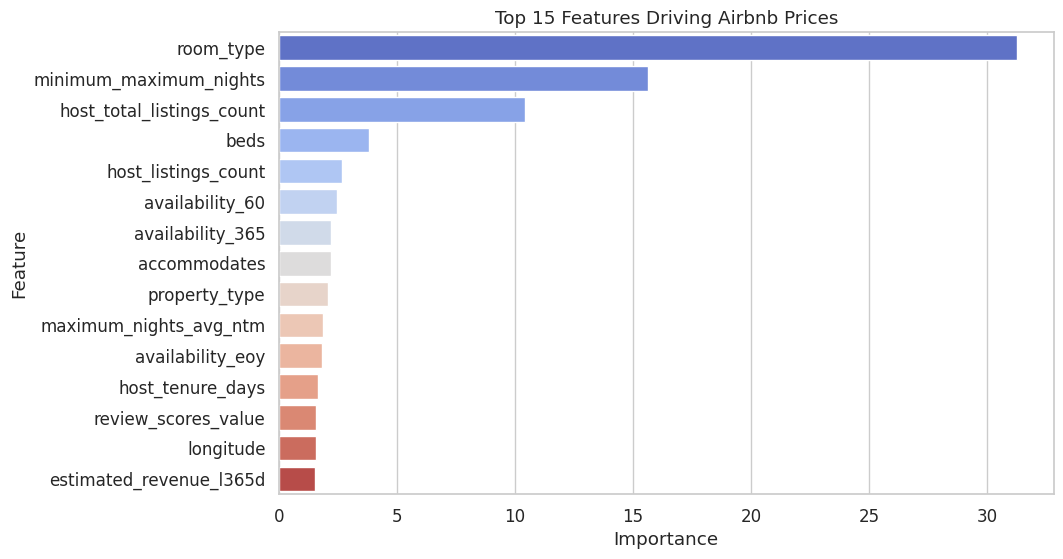

In [18]:
# =====================================
# ✅ GLOBAL AIRBNB PRICE PREDICTION PIPELINE
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# =====================================
# STEP 1: LOAD AND CLEAN DATA
# =====================================
url = "https://data.insideairbnb.com/united-states/ny/new-york-city/2025-10-01/data/listings.csv.gz"
df = pd.read_csv(url, compression='gzip')

# Clean price and drop missing essentials
df = df.dropna(subset=['price', 'latitude', 'longitude'])
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# =====================================
# STEP 2: FEATURE ENGINEERING
# =====================================
# Host rates
def clean_percent(col):
    return pd.to_numeric(col.str.replace('%', ''), errors='coerce') / 100

for col in ['host_response_rate', 'host_acceptance_rate']:
    if col in df.columns:
        df[col] = clean_percent(df[col])

# Host tenure
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_tenure_days'] = (pd.Timestamp('today') - df['host_since']).dt.days
df['host_tenure_days'] = df['host_tenure_days'].fillna(df['host_tenure_days'].median())

# Amenity count
df['amenity_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)

# Bathrooms numeric
df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Price per person (REMOVE LATER to avoid leakage)
df['price_per_person'] = df['price'] / df['accommodates']

# Availability ratio
df['availability_ratio'] = df['availability_365'] / 365

# Multi-host flag
df['multi_host'] = np.where(df['host_listings_count'] > 1, 1, 0)

# =====================================
# STEP 3: DEFINE TARGET AND FEATURES
# =====================================
y = df['price']
X = df.drop(columns=[
    'price', 'log_price', 'price_per_person', 'id', 'name',
    'neighbourhood_group', 'last_review', 'calendar_updated'
], errors='ignore')

# Drop datetime columns (converted already)
X = X.drop(columns=['host_since'], errors='ignore')

# =====================================
# STEP 4: HANDLE MISSING VALUES
# =====================================
# Fill numeric NaN with median
for col in X.select_dtypes(include=np.number).columns:
    X[col] = X[col].fillna(X[col].median())

# Fill categorical NaN with 'Unknown'
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].fillna('Unknown').astype(str)

# =====================================
# STEP 5: TRAIN/TEST SPLIT
# =====================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

# =====================================
# STEP 6: TRAIN CATBOOST MODEL
# =====================================
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    loss_function='RMSE',
    verbose=100
)

model.fit(train_pool, eval_set=test_pool, use_best_model=True, plot=True)

# =====================================
# STEP 7: EVALUATE MODEL
# =====================================
y_pred = model.predict(test_pool)
train_pred = model.predict(train_pool)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# =====================================
# STEP 8: FEATURE IMPORTANCE
# =====================================
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.get_feature_importance()
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(15), x='Importance', y='Feature', palette='coolwarm')
plt.title("Top 15 Features Driving Airbnb Prices")
plt.show()


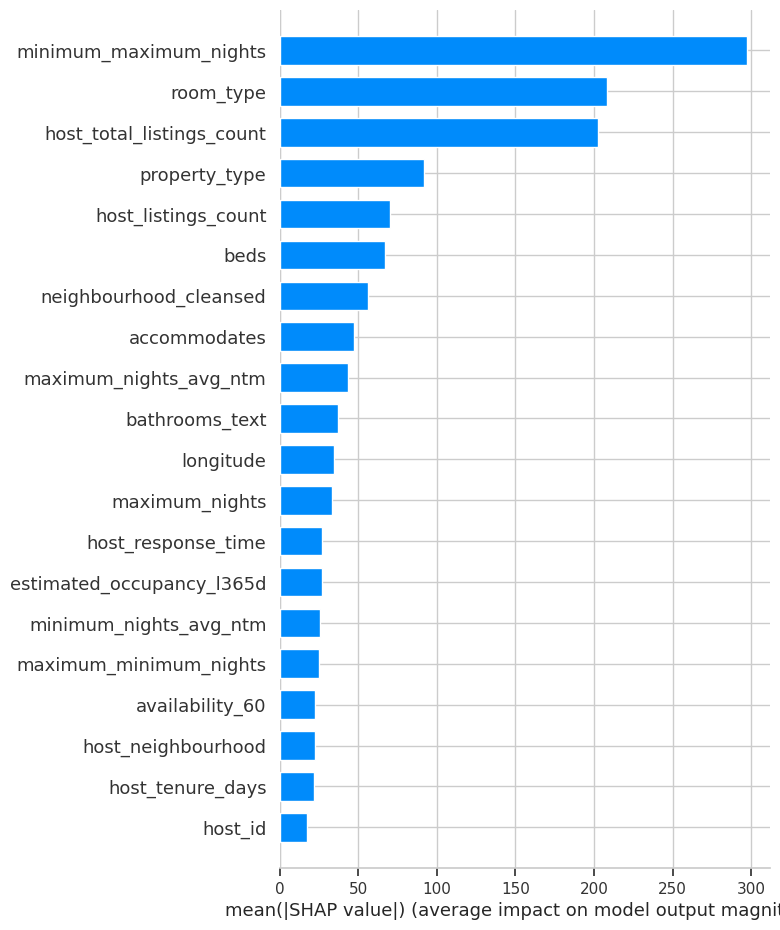

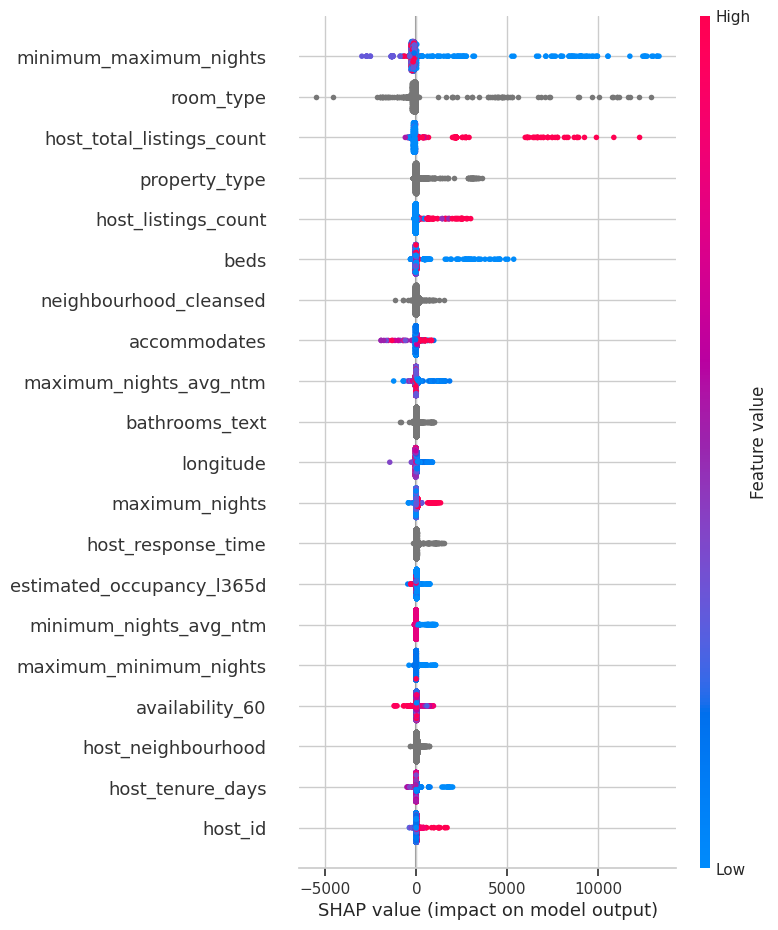

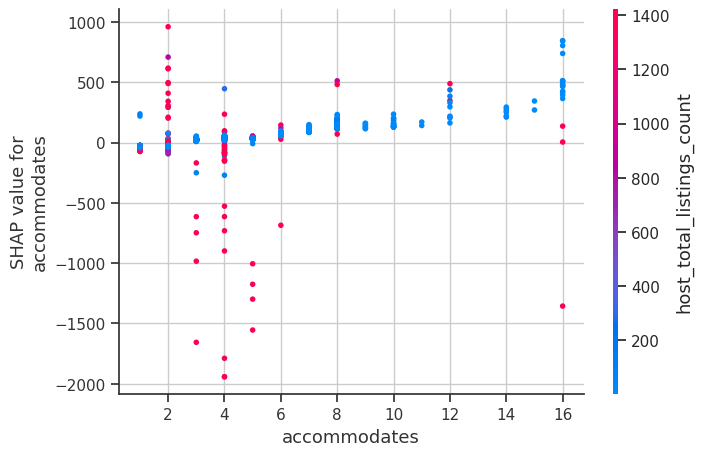

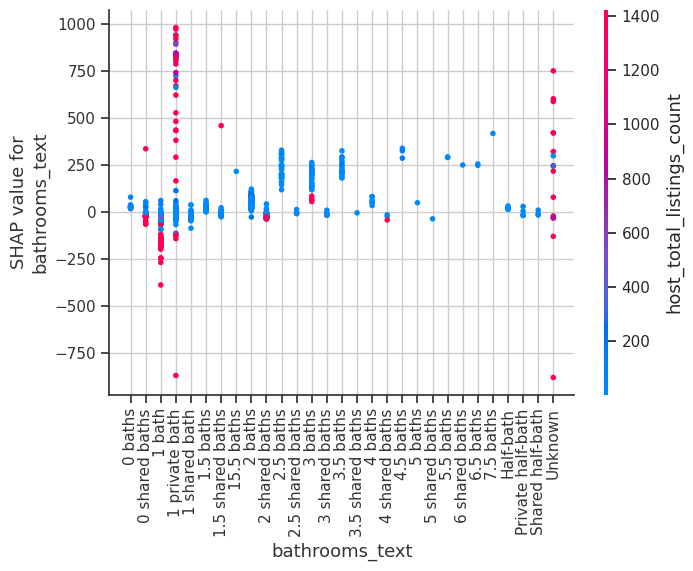

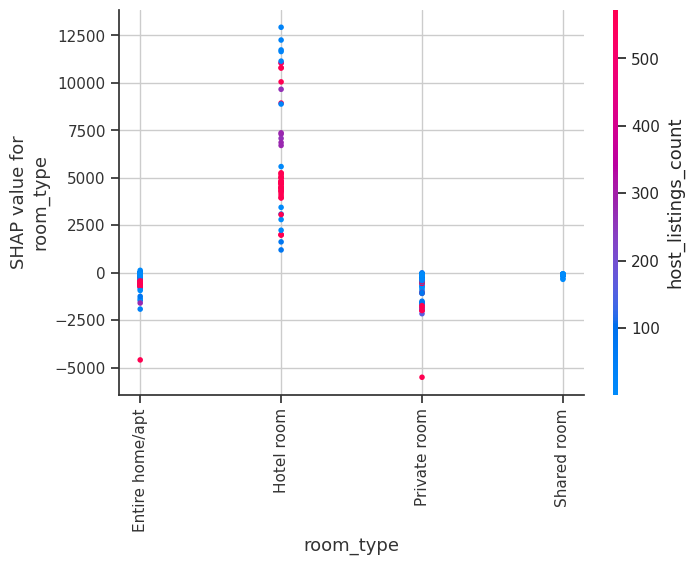

In [19]:
!pip install shap --quiet

import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed summary (beeswarm)
shap.summary_plot(shap_values, X_test)

# PDP for top features (optional, pick 2–3)
for feature in ['accommodates', 'bathrooms_text', 'room_type']:
    shap.dependence_plot(feature, shap_values.values, X_test)


🔍 CatBoost Model Summary for Airbnb Price Prediction


CatBoost is a gradient boosting algorithm developed by Yandex that handles:
- Categorical features natively (no one-hot encoding needed)
- Missing values automatically
- Robust regularization to avoid overfitting

We used CatBoostRegressor with the following setup:
- 500 iterations
- learning_rate=0.05
- depth=8
- loss_function='RMSE'

CatBoost builds decision trees sequentially, each learning from residual errors of the previous tree.
It assigns higher weights to difficult-to-predict instances and continues until convergence.
The final prediction is a weighted ensemble of all weak learners.



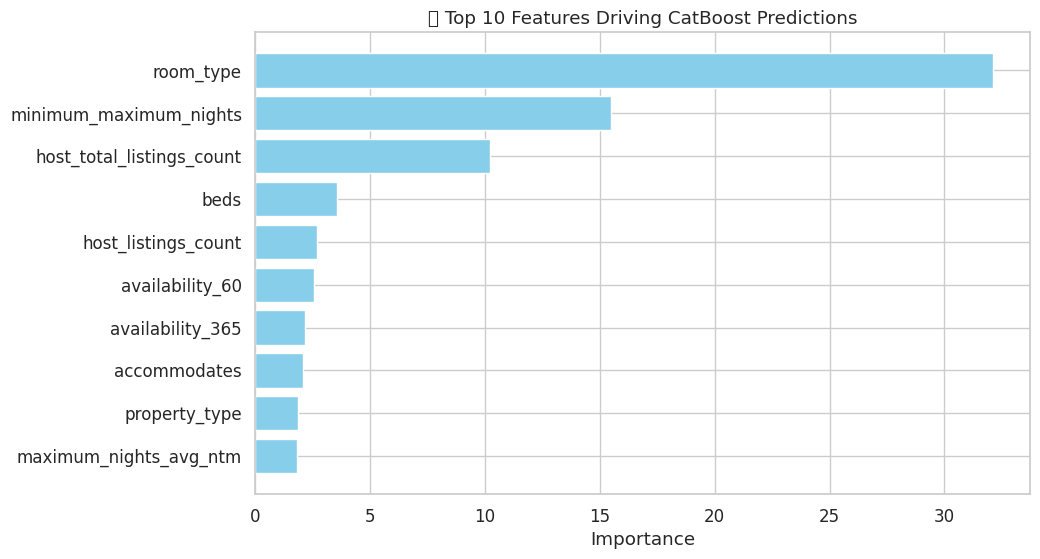

In [20]:
# 🧠 UNDERSTANDING CATBOOST IN THIS PROJECT

from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("🔍 CatBoost Model Summary for Airbnb Price Prediction\n")
print("""
CatBoost is a gradient boosting algorithm developed by Yandex that handles:
- Categorical features natively (no one-hot encoding needed)
- Missing values automatically
- Robust regularization to avoid overfitting

We used CatBoostRegressor with the following setup:
- 500 iterations
- learning_rate=0.05
- depth=8
- loss_function='RMSE'

CatBoost builds decision trees sequentially, each learning from residual errors of the previous tree.
It assigns higher weights to difficult-to-predict instances and continues until convergence.
The final prediction is a weighted ensemble of all weak learners.
""")

# Example prediction explanation using SHAP-like importance
from catboost import Pool
import matplotlib.pyplot as plt

train_pool = Pool(X_train, y_train, cat_features=cat_features)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'].head(10)[::-1], feat_imp['Importance'].head(10)[::-1], color='skyblue')
plt.title("🔍 Top 10 Features Driving CatBoost Predictions")
plt.xlabel("Importance")
plt.show()


In [21]:
# 🔮 View a few sample predictions
pred_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': np.round(y_pred, 2)
}).reset_index(drop=True)

pred_df.head(10)


,Actual Price,Predicted Price
0,144.0,179.62
1,135.0,148.96
2,135.0,173.53
3,630.0,516.15
4,130.0,94.72
5,40.0,27.01
6,101.0,109.33
7,88.0,77.93
8,298.0,497.70
9,61.0,49.82


In [24]:
# 🗽 Airbnb Price Heatmap — New York City (by Coordinates)

import plotly.express as px

# Approximate latitude/longitude bounds for NYC
nyc_df = df[
    (df['latitude'].between(40.5, 40.95)) &
    (df['longitude'].between(-74.3, -73.7))
].copy()

# Drop missing coordinates or prices
nyc_df = nyc_df.dropna(subset=['latitude', 'longitude', 'price'])
# Remove top 1% extreme outliers for readability
nyc_df = nyc_df[nyc_df['price'] < nyc_df['price'].quantile(0.99)]

# Create interactive map
fig = px.scatter_mapbox(
    nyc_df,
    lat='latitude',
    lon='longitude',
    color='price',
    size='accommodates',
    hover_name='neighbourhood',
    hover_data={
        'price': True,
        'room_type': True,
        'accommodates': True,
        'availability_365': True,
        'host_is_superhost': True
    },
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=10,
    zoom=10,
    mapbox_style='carto-positron',
    title='🗽 Airbnb Price Heatmap — New York City'
)

fig.update_layout(height=600)
fig.show()


## 📊 Airbnb Price Prediction in NYC

This notebook explores an Airbnb dataset for New York City, focusing on understanding the factors that influence listing prices and building a predictive model.

**Sections:**
1.  Data Loading and Initial Exploration
2.  Exploratory Data Analysis (EDA)
3.  Feature Engineering
4.  Geospatial Analysis
5.  Model Building (CatBoost)
6.  Model Evaluation
7.  Model Interpretation (SHAP)

### 1. Data Loading and Initial Exploration

Loading the dataset and performing initial checks to understand its structure, content, and identify potential issues like missing values.

### 2. Exploratory Data Analysis (EDA)

Visualizing key distributions and relationships within the data to gain insights into Airbnb prices and other relevant features.

### 3. Feature Engineering

Creating new features and transforming existing ones to improve the predictive power of the model.

### 4. Geospatial Analysis

Visualizing the spatial distribution of Airbnb listings and prices across New York City.

### 5. Model Building (CatBoost)

Training a CatBoost regression model to predict Airbnb prices based on the engineered features.

### 6. Model Evaluation

Evaluating the performance of the trained CatBoost model using relevant metrics.

### 7. Model Interpretation (SHAP)

Using SHAP values to understand the contribution of each feature to the model's predictions.